In [238]:
#from skimage import data, io, filters, morphology
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import operator as op
from PIL import Image, ImageFilter

%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.figsize'] = (20,20)

0.0862745098039 -0.0843137254902
0.0980392156863 -0.109803921569


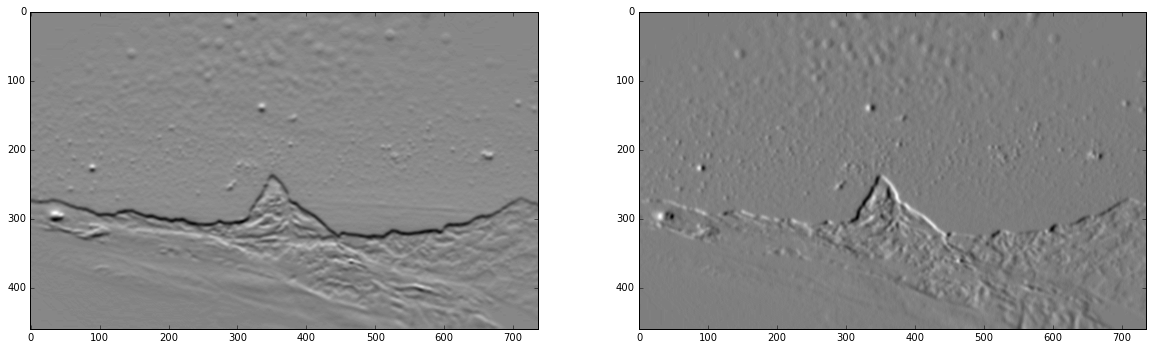

In [239]:
base_img = Image.open('./images/mountain.jpg')
img = base_img.convert('L')
img = img.filter(ImageFilter.GaussianBlur(2))
imgArr = np.asarray(img)/255.0

dy, dx = np.gradient(imgArr)
grad = np.dstack((dx,dy))

print np.max(dx), np.min(dx)
print np.max(dy), np.min(dy)
plt.subplot(1,2,1)
plt.imshow(dy)
plt.subplot(1,2,2)
plt.imshow(dx)

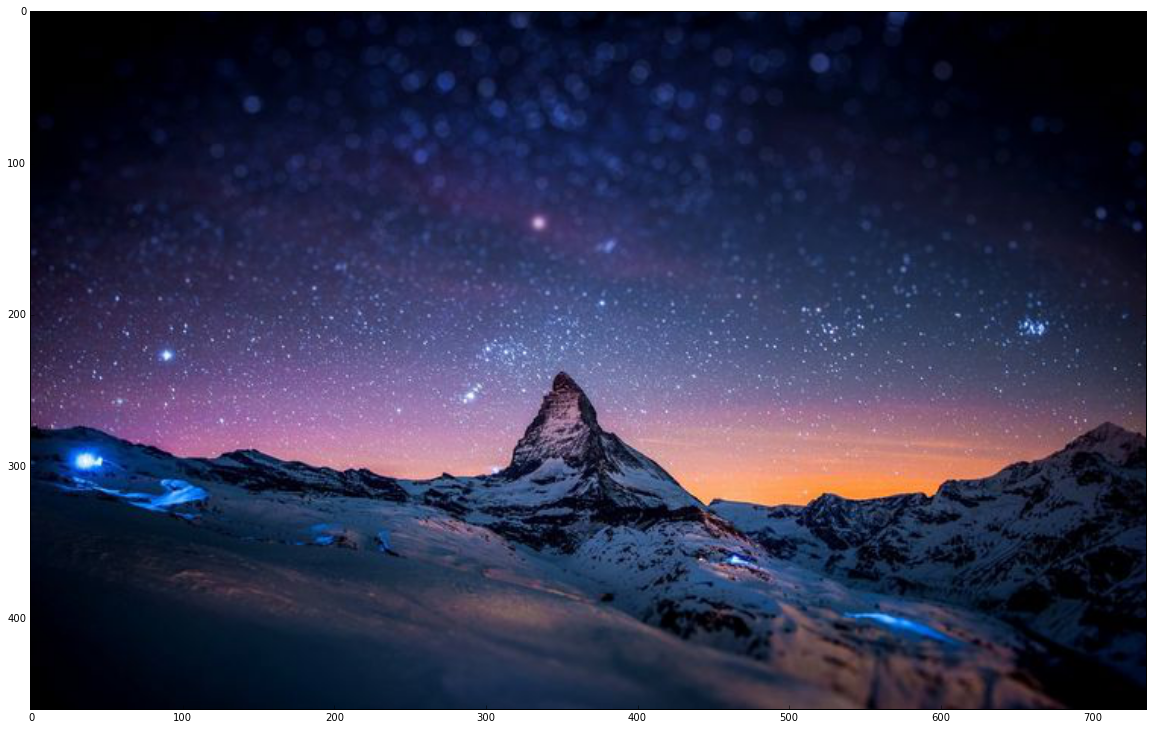

In [240]:
image = np.asarray(base_img)/255.0
width = image.shape[0]
height = image.shape[1]
        
plt.imshow(image)

In [241]:
scale = (width + height)/2
max_control_points = 10
min_control_points = 4
max_line_length = scale/10
max_spline_length = max_line_length * 4
perturb_amount = scale/100

curves = []

In [242]:
# rotates a vector by pi/4 clockwise, used to get edge from gradient
def rot90(v):
    return np.array([v[1], -v[0]])
def cRot180(v):
    if (v[0] < 0):
        return -v
    return v
def norm(v):
    length = math.sqrt(v[0]*v[0] + v[1]*v[1])
    if length == 0:
        return np.array([math.sqrt(0.5),math.sqrt(0.5)])
    return v/length

In [243]:
# Gets the diredction of the gradient at a location x,y based on the 
# bilinear interpolation of the 4 closest grid points. 
def getDir(loc):
    x = loc[0]
    y = loc[1]
    fx = int(math.floor(x))
    fy = int(math.floor(y))
    cx = int(math.ceil(x))
    cy = int(math.ceil(y))
    ax = x - fx
    ay = y - fy
    fyDir = grad[fx][fy]*(1-ax) + grad[cx][fy]*(ax)
    cyDir = grad[fx][cy]*(1-ax) + grad[cx][cy]*(ax)
    gDir = fyDir*(1-ay) + cyDir*(ay)
    return norm(rot90(gDir))

78742 338560


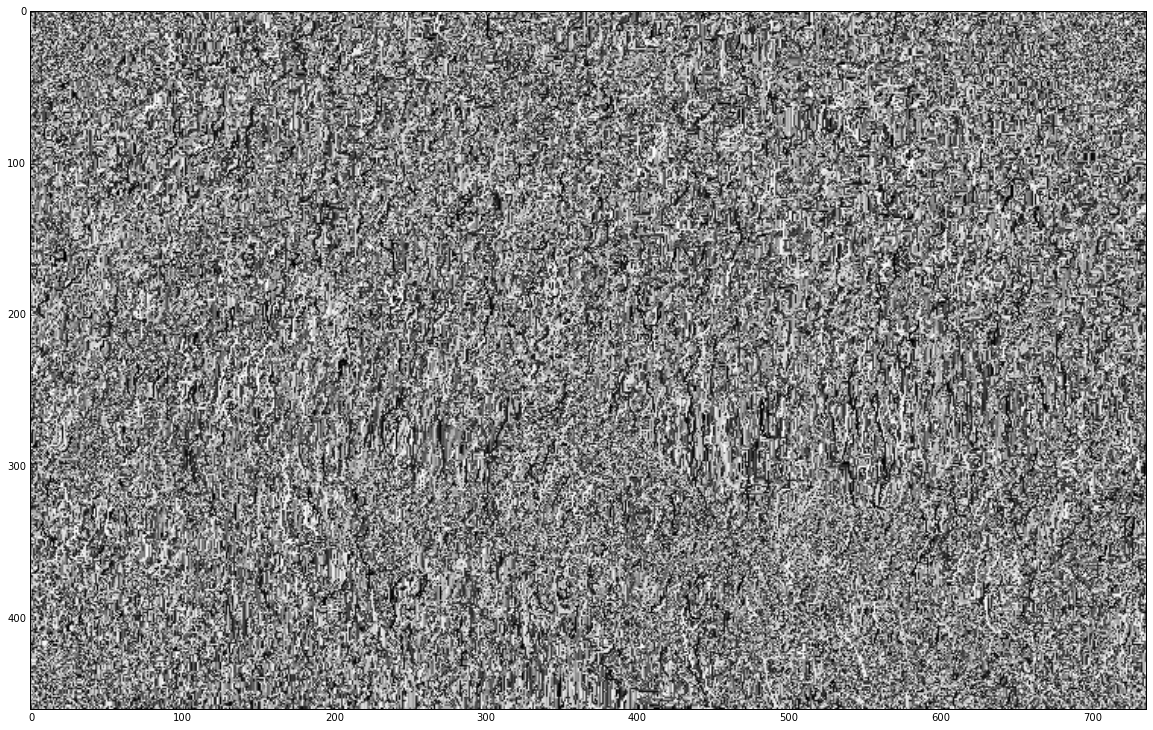

In [244]:
newimg = np.zeros((width,height))
c1 = 0
c2 = 0
for x in range(0,width):
    for y in range(0,height):
        color = random.random()
        loc = np.array([float(x),float(y)])
        while True:
            if (math.ceil(loc[0]) >= width or math.ceil(loc[1]) >= height or 
                newimg[int(math.floor(loc[0]))][int(math.floor(loc[1]))] != 0):
                break
            newimg[int(math.floor(loc[0]))][int(math.floor(loc[1]))] = color
            loc += getDir(loc)

# plt.subplot(1,2,1)
# plt.imshow(base_img)
# plt.subplot(1,2,2)
plt.imshow(newimg)
for i in range(0,width):
    for j in range(0,height):
        if (grad[i][j][1] == 0.0):
            c1 += 1
        c2 += 1
print c1,c2

In [245]:
# Takes in an x and y position, partial spline curve, length of the curve, 
# and the direction of the curve and recursively creates the spline curve
def getCurve(x, y, curve, cLen, cDir):
    pass

In [271]:
def inBounds(p):
    return p[0] >= 0 and p[1] >= 0 and p[0] < width and p[1] < height

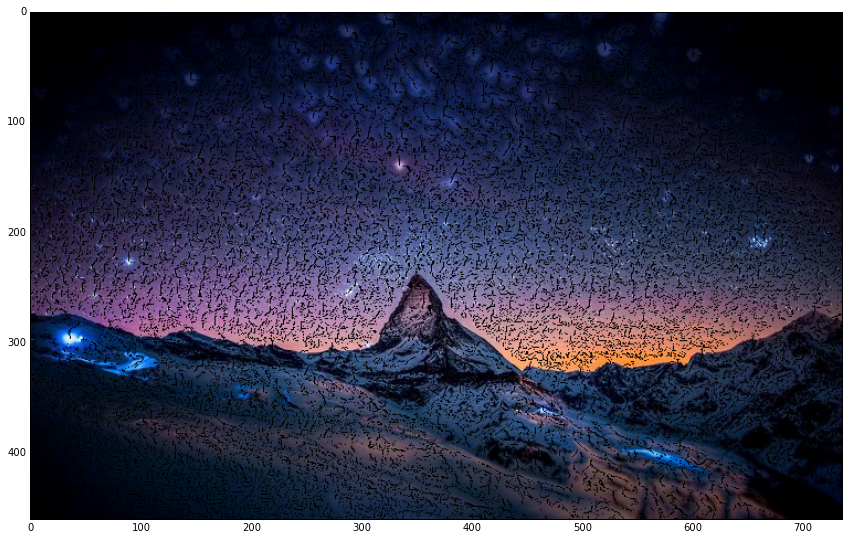

In [274]:
col = np.asarray(base_img)/255.0
pos = np.copy(grad)
vel = np.copy(grad)
nImg = np.copy(col)
zval = np.array([0,0,0])

for i in range(0,len(pos)):
    for j in range(0,len(pos[i])):
        pos[i][j] = np.array([i,j])
        nImg[i][j] = zval

for i in range(0,len(pos)):
    for j in range(0,len(pos[i])):
        vel[i][j] += getDir(pos[i][j])
        pos[i][j] += vel[i][j]
        if (inBounds(pos[i][j])):
            nImg[int(pos[i][j][0])][int(pos[i][j][1])] = col[i][j]
        

plt.subplot(2,1,1)
plt.imshow(base_img)
plt.subplot(2,1,2)
plt.imshow(nImg)